In [59]:
#Improt

from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [60]:
#Load the experiment data：housing_scale.svm
house_scale = load_svmlight_file('C:/Users/Administrator/Desktop/deep learning experients/housing_scale.svm')
print('house data is: ', house_scale)
print(' house data shape:', house_scale[0].shape)

house data is:  (<506x13 sparse matrix of type '<class 'numpy.float64'>'
	with 6578 stored elements in Compressed Sparse Row format>, array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7

In [65]:
#Devide dataset. and train data size is 70%,the test data size is 30%
a_train, a_test, b_train, b_test = train_test_split(house_scale[0], house_scale[1], train_size=0.7, test_size=0.3)
print('train data is:', a_train)
print('test data is:', a_test)

train data is:   (0, 12)	-0.3234
  (0, 11)	1.0
  (0, 10)	0.617021
  (0, 9)	0.828244
  (0, 8)	1.0
  (0, 7)	-0.708136
  (0, 6)	0.649846
  (0, 5)	0.056141
  (0, 4)	0.349794
  (0, 3)	-1.0
  (0, 2)	0.293255
  (0, 1)	-1.0
  (0, 0)	-0.850543
  (1, 12)	-0.0182119
  (1, 11)	0.944828
  (1, 10)	0.617021
  (1, 9)	0.828244
  (1, 8)	1.0
  (1, 7)	-0.829861
  (1, 6)	0.942327
  (1, 5)	0.0902472
  (1, 4)	0.460905
  (1, 3)	-1.0
  (1, 2)	0.293255
  (1, 1)	-1.0
  :	:
  (352, 11)	0.993898
  (352, 10)	0.617021
  (352, 9)	0.828244
  (352, 8)	1.0
  (352, 7)	-0.840828
  (352, 6)	1.0
  (352, 5)	0.0185859
  (352, 4)	0.460905
  (352, 3)	-1.0
  (352, 2)	0.293255
  (352, 1)	-1.0
  (352, 0)	-0.872765
  (353, 12)	-0.651214
  (353, 11)	0.928892
  (353, 10)	1.0
  (353, 9)	-0.438931
  (353, 8)	-0.73913
  (353, 7)	0.719776
  (353, 6)	-0.608651
  (353, 5)	-0.194482
  (353, 4)	-0.884774
  (353, 3)	-1.0
  (353, 2)	-0.893695
  (353, 1)	0.6
  (353, 0)	-0.999175
test data is:   (0, 12)	-0.516004
  (0, 11)	0.984064
  (0, 10)	-0.

In [62]:
#Initialize linear model parameters.weight matrix and bias term------w and b
w = np.random.randn(a_train.shape[1])
b = np.random.randn()

print('weight matrix shape:', w.shape)

weight matrix shape: (13,)


In [63]:
#Choose loss function and derivation  
#Calculate gradient G toward loss function from all samples.
#Denote the opposite direction of gradient  G as D .
#Update model is learning rate, a hyper-parameter that we can adjust.
#Get the loss function  under the training set and  by validating under validation set.

# the number of iteration 
iteration_times = 200  
# learning rate, gradient descent
n = 1
# train loss value
train_total_loss = []
# test loss value
test_total_loss = []    
for i in range(iteration_times):
    # w * b's shape is equal to b's shape
    b_pred = a_train*w + b
    # square loss function of train data
    loss_train = 0.5*np.linalg.norm(b_pred - b_train)   
    b_test_pred = a_test*w + b
    # square loss function of test data
    loss_test = 0.5*np.linalg.norm(b_test_pred - b_test)    
    train_total_loss.append(loss_train)  
     # add list
    test_total_loss.append(loss_test)
    # update w and b
    w = w - n*(b_pred - b_train)*a_train/a_train.shape[0]
    b = b - n*np.mean(b_pred - b_train)

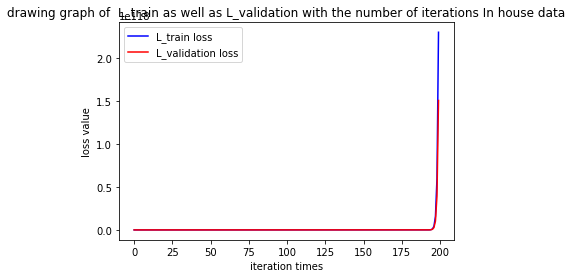

In [64]:
#drawing graph of  L_train as well as L_validation with the number of iterations.

plt.figure()
plt.title('drawing graph of  L_train as well as L_validation with the number of iterations In house data')
plt.plot(range(len(train_total_loss)), train_total_loss, color='b', label='L_train loss')

plt.plot(range(len(test_total_loss)), test_total_loss, color='r', label='L_validation loss')
plt.xlabel('iteration times')
plt.ylabel('loss value')
plt.legend()
plt.show()

In [67]:
#Linear Classification and Gradient Descent

australian_scale = load_svmlight_file('C:/Users/Administrator/Desktop/deep learning experients/australian_scale.svm')
print('australian data is:', australian_scale)
print(' australian data shape:', house_scale[0].shape)

australian data is: (<690x14 sparse matrix of type '<class 'numpy.float64'>'
	with 8447 stored elements in Compressed Sparse Row format>, array([-1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,
        1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,
        1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,
       -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,
        1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
        1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,
        1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.

In [68]:
#Devide dataset. and train data size is 70%,the test data size is 30%
a_train, a_test, b_train, b_test = train_test_split(australian_scale[0],australian_scale[1], train_size=0.7, test_size=0.3)
print('train data is:', a_train)
print('test data is:', a_test)


train data is:   (0, 13)	-1.0
  (0, 12)	-0.52
  (0, 10)	-1.0
  (0, 9)	-1.0
  (0, 8)	-1.0
  (0, 7)	-1.0
  (0, 6)	-0.789474
  (0, 5)	-0.25
  (0, 4)	0.0769231
  (0, 2)	-0.714286
  (0, 1)	-0.238195
  (0, 0)	-1.0
  (1, 13)	-1.0
  (1, 12)	-0.924
  (1, 10)	-1.0
  (1, 9)	-1.0
  (1, 8)	-1.0
  (1, 7)	-1.0
  (1, 6)	-1.0
  (1, 5)	-1.0
  (1, 4)	-1.0
  (1, 2)	-0.892857
  (1, 1)	-0.24812
  (1, 0)	-1.0
  (2, 13)	-1.0
  :	:
  (480, 13)	-1.0
  (480, 12)	-0.72
  (480, 10)	-1.0
  (480, 9)	-1.0
  (480, 8)	-1.0
  (480, 7)	-1.0
  (480, 6)	-0.77193
  (480, 5)	-1.0
  (480, 4)	-1.0
  (480, 3)	-1.0
  (480, 2)	-0.910714
  (480, 1)	-0.744361
  (480, 0)	-1.0
  (481, 13)	-1.0
  (481, 12)	-0.978
  (481, 10)	1.0
  (481, 9)	-0.791045
  (481, 8)	1.0
  (481, 7)	1.0
  (481, 6)	0.403509
  (481, 5)	1.0
  (481, 4)	0.384615
  (481, 2)	-0.214286
  (481, 1)	0.553985
  (481, 0)	1.0
test data is:   (0, 13)	-1.0
  (0, 12)	-1.0
  (0, 10)	-1.0
  (0, 9)	-0.910448
  (0, 8)	1.0
  (0, 7)	1.0
  (0, 6)	-0.929825
  (0, 5)	-0.25
  (0, 4)	0.

In [70]:
#Initialize SVM model parameters. You can choose to set all parameter into zero, initialize it randomly or with normal distribution.
#Initialize linear model parameters.weight matrix and bias term------w and b

w = np.random.randn(a_train.shape[1])
b = np.random.randn()
print('weight matrix shape:', w.shape)

weight matrix shape: (14,)


In [73]:
#Choose loss function and derivation  
#Calculate gradient G toward loss function from all samples.
#Denote the opposite direction of gradient  G as D .
#Update model is learning rate, a hyper-parameter that we can adjust.
#Get the loss function  under the training set and  by validating under validation set.
iteration_times = 100
lamb = 0.1 
 # train loss value
train_total_loss = []  
# test loss value
test_total_loss = []    
for i in range(iteration_times):
    hinge_temp = 1 - b_train*(a_train*w + b)
    hinge_temp[hinge_temp < 0] = 0
     # hinge loss function of train data
    loss_train = np.sum(hinge_temp) + 0.5*lamb*np.linalg.norm(w)   
    
    hinge_temp = 1 - b_test*(a_test*w + b)
    hinge_temp[hinge_temp < 0] = 0
     # hinge loss function of test data
    loss_test = np.sum(hinge_temp) + 0.5*lamb*np.linalg.norm(w)   

    train_total_loss.append(loss_train)   
     # add list
    test_total_loss.append(loss_test)
            
    # update w and b
    # w_delta = alpha*y_train*x_train
    for j in range(a_train.shape[0]):
        if b_train[j]*(a_train[j]*w + b) < 1:
            w = w + (lamb*b_train[j]*a_train[j]).toarray()[0]
            b = b + lamb*b_train[j] 

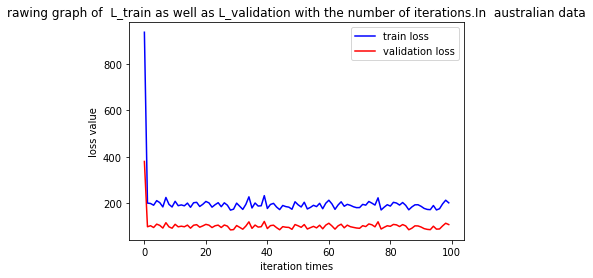

In [72]:
#drawing graph of  L_train as well as L_validation with the number of iterations.

plt.figure()
plt.title('rawing graph of  L_train as well as L_validation with the number of iterations.In  australian data')
plt.plot(range(len(train_total_loss)), train_total_loss, color='b', label='train loss')

plt.plot(range(len(test_total_loss)), test_total_loss, color='r', label='validation loss')
plt.xlabel('iteration times')
plt.ylabel('loss value')
plt.legend()
plt.show()